# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Christina Ho
- Doljinsuren Zandanshatar
- Janine Hou
- Lawrence Ngo
- Tatjana Tam

# Group Members IDs

- A13542382
- A13756923
- A12998815
- A13466300
- A14064063

# Research Question

   In our data science project we ask the question: is there a relationship between the type of curse words used in Quentin Tarantino’s movies (from 1992-2012 excluding Death Proof) and the success of those movies? By grouping all the curse words into the four categories of swear words as defined by Professor Benjamin Bergen (religious concept, sexual activities, bodily functions and organs, and derogatory language for other social groups), we will analyze the category frequency per film with different metrics of success. We will explore success by comparing each movie’s net gross (in dollars), critical success (as a percent), and Academy awards (in numbers). 


## Background and Prior Work

Quentin Tarantino is a well-established, acclaimed, and successful director best known for the unique style of his films. Some hallmarks of his films include non-linear storytelling, satire, and pop culture references. Tarantino is also known for employing numerous instances of stylized, graphic violence and an abundance of profanity throughout all of his films and thus they have all garnered “R” ratings. Based on the common theme of swear words and given the success and popularity of his films, our team wondered if there was any correlation between the types of swear words spoken and each film’s success. 

A previous study of Tarantino’s films has found that the spread of profanity across his movies has not been consistent: over 75% of curse words were found in just three out of seven films studied, and over 90% of cursing in his movies was found in four out of the seven (2). Additionally, Tarantino seems to have a penchant for using various forms of the F-word, as its different forms make up a majority of curse words used in his films (2). The study also found that the types of swear words employed vary in proportion across movies depending on the type of film it was: for instance, while the F-word makes up a majority of curse words uttered in most of Tarantino’s films,  Django Unchained was an exception in that it featured far more racial slurs compared to other types of swearing since it was a period piece about slavery (2). It was also noted that Tarantino’s use of “R-rated” swear words such as the F-word has decreased in recent years, possibly due to increasing mainstream popularity of his films (2).

Another study has shown that while the amount of expletives has actually decreased in teen-oriented films over the years, it has increased in teen-oriented television shows (1). In addition, there is a difference in the type of swear words used and how often it is used between genders (1). This led us to explore whether swear words, and specifically what types, in Quentin Tarantino’s movies had an effect on how successfully the film performed.


References (include links):
- 1)  https://scholarsarchive.byu.edu/cgi/viewcontent.cgi?article=1136&context=facpub

- 2) http://rstudio-pubs-static.s3.amazonaws.com/235553_58fbac0330f0432e9be75dca4df07b6b.html


# Hypothesis


   We expect that movies with the highest amount of swear words related to sexual activity will be most successful as a whole (equally weighing net gross, critical success, and awards) since these are very prevalent in mainstream society and used very frequently, however it will be interesting to see how each category relates to different type of success (perhaps movies with high amounts of derogatory swear words will amount in the greatest award success due to the sensitivity of the subject).

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

- Dataset Name: Tarantino
- Link to the dataset: https://github.com/fivethirtyeight/data/tree/master/tarantino
- Number of observations: 1895
- Description: This dataset contains entries of all curse words, deaths, and their time location that have occurred in Quentin Tarantino's movies from 1992 - 2012 excluding Death Proof.


- Dataset Name: IMDB 5000
- Link to the dataset: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset
- Number of observations: 5044
- Description: This dataset contains entries of 5000+ movies and their related information found on IMDB such as, IMDB score, budget, gross, and etc. 


- Dataset Name: The Academy Awards 1927-2015
- Link to the dataset: https://www.kaggle.com/theacademy/academy-awards
- Number of observations: 9964
- Description: This dataset contains entries of all Academy Award nominations, their category, and whether they won.


We plan to use the Tarantino dataset to categorize the curse words used in his specified films and compare them to the different measures of success, such as, net gross and critical success through IMDB 5000's variables, gross, budget, and IMDB score, and Academy Awards success through the Academy Award 1927-2015' winning variable.


# Setup

In [1]:
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Cleaning

Describe your data cleaning steps here.

In [15]:
movie_list=['Django Unchained', 'Django Unchained ', 'Inglourious Basterds', 'Inglourious Basterds ', 'Kill Bill: Vol. 1', 'Kill Bill: Vol. 2', 'Jackie Brown', 'Pulp Fiction', 'Pulp Fiction ', 'Reservoir Dogs']
religion=['goddamned', 'bastards', 'bastard', 'goddamn', 'damn', 'damned', 'hell']
sexual=['fucked', 'fucking', 'fuck', 'fucks', 'fucker', 'fuckers', 'fuckup', 'motherfucker',  'cockblockery',  'fuckface', 'cocksucker', 'fuckhead', 'motherfuckers', 'motherfucking']
body=['dick', 'dicks', 'dumbass','jackass', 'shit', 'shitload', 'horseshit',  'shittiest', 'pussy', 'bullshit', 'shitless', 'shitting', 'horeshit', 'merde', 'shithead',  'chickenshit', 'dickless', 'ass', 'asses', 'asshole', 'assholes', 'asshead', 'shitty']
other=['slut', 'squaw', 'negro', 'negro ', 'jew', 'jew (verb)', 'n-word','n-word ', 'gook', 'gooks', 'slope', 'bitch', 'bitches', 'faggot', 'jap', 'japs', 'wetback', 'cunt', 'cunts',]

words = pd.read_csv('tarantino.csv')
words = words.drop(['minutes_in', 'type'], axis=1)
words = words.dropna()
words['category'] = np.nan
words.loc[words['word'].isin(religion), 'category'] = 'religion'
words.loc[words['word'].isin(sexual), 'category'] = 'sexual terms'
words.loc[words['word'].isin(body), 'category'] = 'bodily functions or organs'
words.loc[words['word'].isin(other), 'category'] = 'derogatory terms against social groups'
print(words['category'].isnull().sum())
#print(words['category'].isnull())
print(words)

imdb = pd.read_csv('movie_metadata.csv')
imdb = imdb.drop(imdb[imdb.director_name != 'Quentin Tarantino'].index)
imdb = imdb.loc[:,['movie_title', 'gross', 'budget', 'imdb_score']]
print(imdb)

awards = pd.read_csv('database.csv')
awards = awards[awards['Film'].isin(movie_list) | awards['Name'].isin(movie_list)]
awards = awards.loc[:,['Winner', 'Film', 'Name']]
for i,award_row in awards.iterrows():
    for movie_index in range(0, len(movie_list)):
        name_storage = awards.loc[i,'Name']
        if name_storage == movie_list[movie_index]:
            film_storage = award_row["Name"]
            awards.loc[i,'Name'] = award_row['Film']
            awards.loc[i,'Film'] = film_storage
awards = awards.loc[:,['Winner', 'Film']]
#awards = awards.drop('Name', axis=1)
print(awards)


0
               movie          word                    category
0     Reservoir Dogs          dick  bodily functions or organs
1     Reservoir Dogs         dicks  bodily functions or organs
2     Reservoir Dogs        fucked                sexual terms
3     Reservoir Dogs       fucking                sexual terms
4     Reservoir Dogs      bullshit  bodily functions or organs
...              ...           ...                         ...
1888    Jackie Brown  motherfucker                sexual terms
1889    Jackie Brown  motherfucker                sexual terms
1890    Jackie Brown           ass  bodily functions or organs
1891    Jackie Brown       fucking                sexual terms
1892    Jackie Brown       goddamn                    religion

[1704 rows x 3 columns]
                movie_title     gross    budget  imdb_score
296       Django Unchained   1.63e+08  1.00e+08         8.5
588   Inglourious Basterds   1.21e+08  7.50e+07         8.3
706      The Hateful Eight   5.41e+07

In [3]:
count = words['movie'].unique()
print(count)

['Reservoir Dogs' 'Pulp Fiction' 'Kill Bill: Vol. 1' 'Kill Bill: Vol. 2'
 'Inglorious Basterds' 'Django Unchained' 'Jackie Brown']


[48, 12, 15, 23, 129, 120, 99]


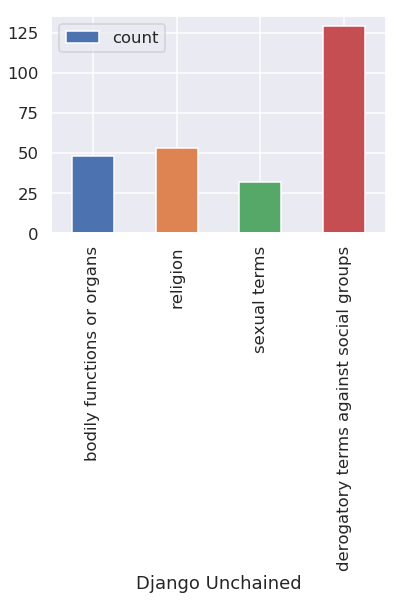

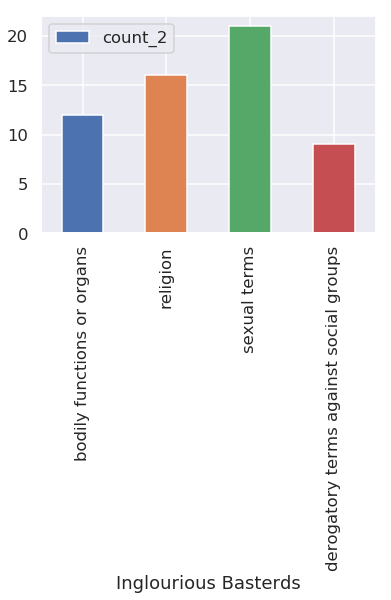

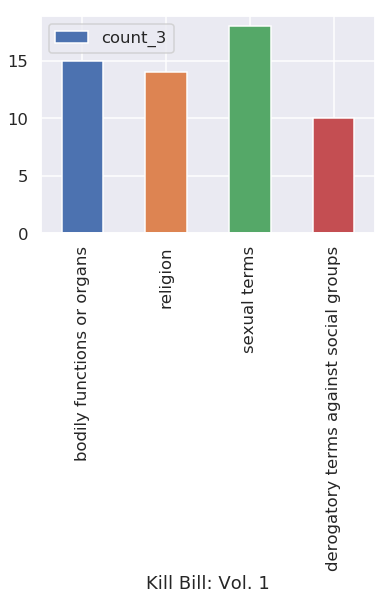

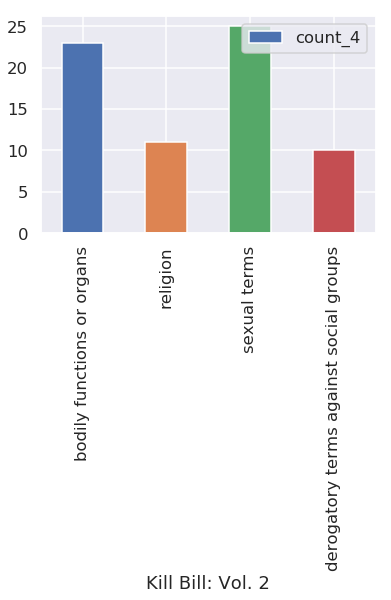

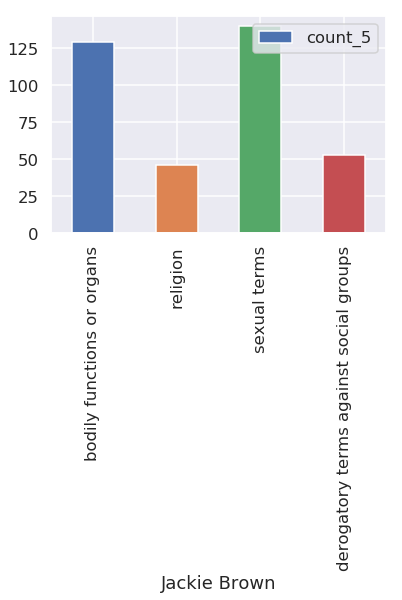

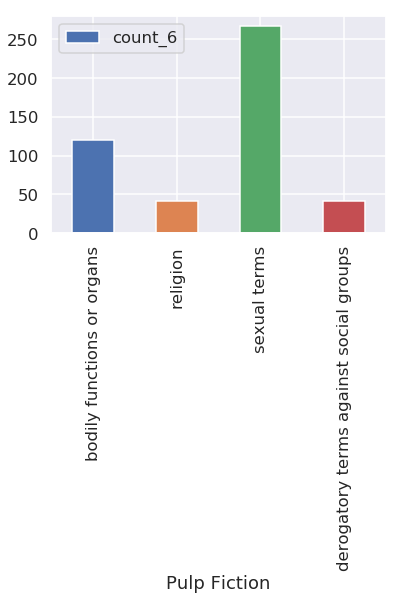

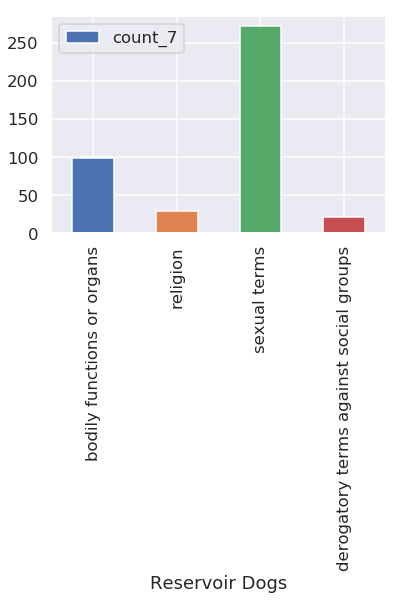

In [12]:
def sum_religion(df):
    return (df.category == 'religion').sum()
def sum_body(df):
    return (df.category == 'bodily functions or organs').sum()
def sum_sex(df):
    return (df.category == 'sexual terms').sum()
def sum_derogatory(df):
    return (df.category == 'derogatory terms against social groups').sum()
#Django Unchained
django1_df = words.drop(['word'], axis=1)
django_df = django1_df[django1_df['movie'] == 'Django Unchained']
django_body = sum_body(django_df)
django_religion = sum_religion(django_df)
django_sex = sum_sex(django_df)
django_derogatory = sum_derogatory(django_df)
count=[int(django_body), int(django_religion), int(django_sex), int(django_derogatory)]
categories = ['bodily functions or organs', 'religion', 'sexual terms', 'derogatory terms against social groups']
data_django = {'Django Unchained':categories,'count':count}
df_django = pd.DataFrame(data_django)
django_bar = df_django.plot.bar(x='Django Unchained', y='count')

#Inglourious Basterds
inglor1_df = words.drop(['word'], axis=1)
inglor_df = inglor1_df[inglor1_df['movie'] == 'Inglorious Basterds']
inglor_body = sum_body(inglor_df)
inglor_religion = sum_religion(inglor_df)
inglor_sex = sum_sex(inglor_df)
inglor_derogatory = sum_derogatory(inglor_df)
count_2=[int(inglor_body), int(inglor_religion), int(inglor_sex), int(inglor_derogatory)]
categories_2 = ['bodily functions or organs', 'religion', 'sexual terms', 'derogatory terms against social groups']
data_inglor = {'Inglourious Basterds':categories_2,'count_2':count_2}
df_inglor = pd.DataFrame(data_inglor)
inglor_bar = df_inglor.plot.bar(x='Inglourious Basterds', y='count_2')


#Kill Bill: Vol. 1
kill1_df = words.drop(['word'], axis=1)
kill_df = kill1_df[kill1_df['movie'] == 'Kill Bill: Vol. 1']
kill_body = sum_body(kill_df)
kill_religion = sum_religion(kill_df)
kill_sex = sum_sex(kill_df)
kill_derogatory = sum_derogatory(kill_df)
count_3=[int(kill_body), int(kill_religion), int(kill_sex), int(kill_derogatory)]
categories_3 = ['bodily functions or organs', 'religion', 'sexual terms', 'derogatory terms against social groups']
data_kill = {'Kill Bill: Vol. 1':categories_3,'count_3':count_3}
df_kill = pd.DataFrame(data_kill)
kill_bar = df_kill.plot.bar(x='Kill Bill: Vol. 1', y='count_3')


#'Kill Bill: Vol. 2'
kill21_df = words.drop(['word'], axis=1)
kill2_df = kill21_df[kill21_df['movie'] == 'Kill Bill: Vol. 2']
kill2_body = sum_body(kill2_df)
kill2_religion = sum_religion(kill2_df)
kill2_sex = sum_sex(kill2_df)
kill2_derogatory = sum_derogatory(kill2_df)
count_4=[int(kill2_body), int(kill2_religion), int(kill2_sex), int(kill2_derogatory)]
categories_4 = ['bodily functions or organs', 'religion', 'sexual terms', 'derogatory terms against social groups']
data_kill2 = {'Kill Bill: Vol. 2':categories_4,'count_4':count_4}
df_kill2 = pd.DataFrame(data_kill2)
kill2_bar = df_kill2.plot.bar(x='Kill Bill: Vol. 2', y='count_4')

#'Jackie Brown'
jackie1_df = words.drop(['word'], axis=1)
jackie_df = jackie1_df[jackie1_df['movie'] == 'Jackie Brown']
jackie_body = sum_body(jackie_df)
jackie_religion = sum_religion(jackie_df)
jackie_sex = sum_sex(jackie_df)
jackie_derogatory = sum_derogatory(jackie_df)
count_5=[int(jackie_body), int(jackie_religion), int(jackie_sex), int(jackie_derogatory)]
categories_5 = ['bodily functions or organs', 'religion', 'sexual terms', 'derogatory terms against social groups']
data_jackie = {'Jackie Brown':categories_5,'count_5':count_5}
df_jackie = pd.DataFrame(data_jackie)
jackie_bar = df_jackie.plot.bar(x='Jackie Brown', y='count_5')

#'Pulp Fiction'
pulp1_df = words.drop(['word'], axis=1)
pulp_df = pulp1_df[pulp1_df['movie'] == 'Pulp Fiction']
pulp_body = sum_body(pulp_df)
pulp_religion = sum_religion(pulp_df)
pulp_sex = sum_sex(pulp_df)
pulp_derogatory = sum_derogatory(pulp_df)
count_6=[int(pulp_body), int(pulp_religion), int(pulp_sex), int(pulp_derogatory)]
categories_6 = ['bodily functions or organs', 'religion', 'sexual terms', 'derogatory terms against social groups']
data_pulp = {'Pulp Fiction':categories_6,'count_6':count_6}
df_pulp = pd.DataFrame(data_pulp)
pulp_bar = df_pulp.plot.bar(x='Pulp Fiction', y='count_6')

#'Reservoir Dogs'
dogs1_df = words.drop(['word'], axis=1)
dogs_df = dogs1_df[dogs1_df['movie'] == 'Reservoir Dogs']
dogs_body = sum_body(dogs_df)
dogs_religion = sum_religion(dogs_df)
dogs_sex = sum_sex(dogs_df)
dogs_derogatory = sum_derogatory(dogs_df)
count_7=[int(dogs_body), int(dogs_religion), int(dogs_sex), int(dogs_derogatory)]
categories_7 = ['bodily functions or organs', 'religion', 'sexual terms', 'derogatory terms against social groups']
data_dogs = {'Reservoir Dogs':categories_7,'count_7':count_7}
df_dogs = pd.DataFrame(data_dogs)
dogs_bar = df_dogs.plot.bar(x='Reservoir Dogs', y='count_7')


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [5]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

Descriptive Analysis:
- Size
- Missingness
- Shape
- Central Tendency
- Variability

In [6]:
print(words.shape)
print(imdb.shape)
print(awards.shape)

(1704, 3)
(8, 4)
(21, 2)


In [7]:
null_words = words.isnull().any(axis=1)
print(null_words.sum())

null_imdb = imdb.isnull().any(axis=1)
print(null_imdb.sum())

null_awards = awards.isnull().any(axis=1)
print(null_awards.sum())


0
0
17


In [8]:
Shape (graph and)

SyntaxError: invalid syntax (<ipython-input-8-526318a9de71>, line 1)

In [ ]:
Central Tendency (mean, mode (word frequency), median)

In [ ]:
Variability ()

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*